## svm for Social Network data
## Ibrahim Mohamed Shedoh
## 31/10/2024

In [1]:
#importing neccassary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.shape

(400, 5)

In [9]:
# the indo of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [15]:
# choosing dependent and independent features 
X = df.iloc[:, [2,3]]
y = df.iloc[:,[4]] # target feature

In [16]:
#the first 2 rows of x
x.head(2)

,Age,EstimatedSalary
0,19,19000
1,35,20000


In [17]:
# spilitting the dataset in to training and test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
# printing training data
print('trained data: ', X_train.shape)
print('trained data: ', X_test.shape)

trained data:  (300, 2)
trained data:  (100, 2)


In [23]:
# feature scalling 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [24]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
classifier = SVC(kernel='linear', random_state=0)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#checking accurence
from sklearn.metrics import accuracy_score

print('accurence score: with linear kernel')
print(metrics.accuracy_score(y_test, y_pred))

accurence score: with linear kernel
0.88


In [34]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
classifier = SVC(kernel='rbf')

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

print('accurence score: with rbf kernel')
print(metrics.accuracy_score(y_test, y_pred))

accurence score: with rbf kernel
0.93


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
classifier = SVC(kernel='rbf', gamma= 15, C= 7, random_state=0 )

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

print('accurence score: using rbf kernel with gamma and C(regularization)')
print(metrics.accuracy_score(y_test, y_pred))

accurence score: using rbf kernel with gamma and C(regularization)
0.93


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
from sklearn.svm import SVC

# Initialize the SVM classifier with a linear kernel
classifier = SVC(kernel='poly', degree = 4)

# Fit the classifier to the training data
classifier.fit(X_train, y_train)

print('accurence score: using poly kernel with degree of 4')
print(metrics.accuracy_score(y_test, y_pred))

accurence score: using poly kernel with degree of 4
0.93


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


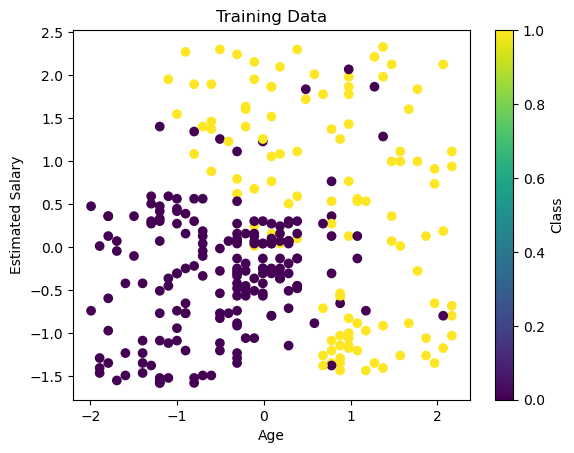

In [41]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Plotting the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train_encoded, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.colorbar(label='Class')  # Optional: shows color legend for classes
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


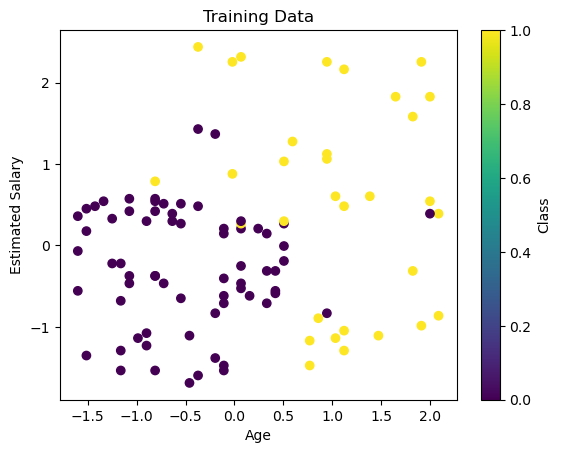

In [44]:
 from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Plotting the training data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_encoded, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.colorbar(label='Class')  # Optional: shows color legend for classes
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


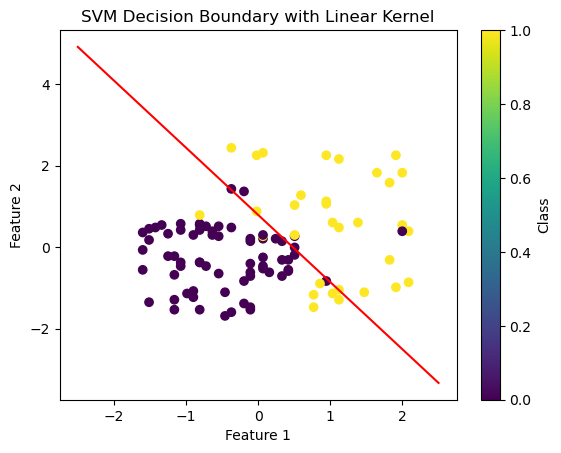

In [47]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the SVM classifier with a linear kernel
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train_encoded)

# Scatter plot of the test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_encoded, cmap='viridis')

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy, color='red')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with Linear Kernel')
plt.colorbar(label='Class')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Accuracy score with RBF kernel: 93.00%


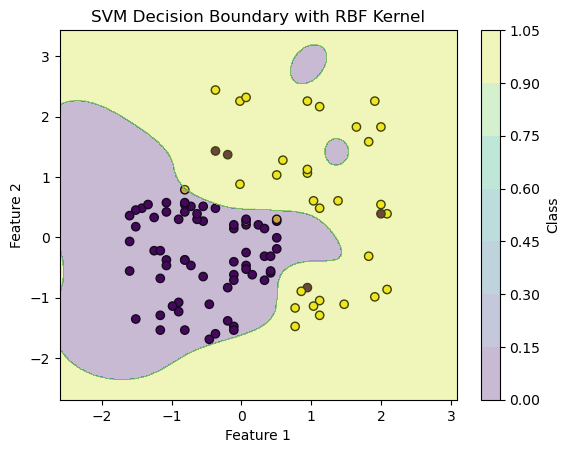

In [50]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Encode categorical labels in y_train and y_test
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the SVM classifier with an RBF kernel and specified gamma and C
classifier = SVC(kernel='rbf', gamma=1, C=100, random_state=0)
classifier.fit(X_train, y_train_encoded)

# Predict test set results
y_pred = classifier.predict(X_test)

# Print accuracy score
print(f"Accuracy score with RBF kernel: {accuracy_score(y_test_encoded, y_pred) * 100:.2f}%")

# Plot test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_encoded, cmap='viridis', marker='o', edgecolor='k')

# Generate a grid to visualize the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.colorbar(label='Class')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary with RBF Kernel')
plt.show()
